<a href="https://colab.research.google.com/github/kvin-alxndr/DL-Classification/blob/main/DL-Text-Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DL-Text-Classification



1.- Preprocesamiento

In [ ]:
!pip install keras-core
!pip install scikit-learn

In [ ]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' # Disable tensorflow debugging logs
import pandas as pd
os.environ["KERAS_BACKEND"] = "torch"
import keras_core as keras
import torch

torch.__version__

'2.0.1+cu118'

In [ ]:
train_df = pd.read_csv('cyberbullying_train.csv')
val_df = pd.read_csv('cyberbullying_val.csv')
test_df = pd.read_csv('cyberbullying_test.csv')

In [ ]:
train_df.head()


,tweet_text,cyberbullying_type
0,@AntonSirius @erinspice @prpltnkr @ChiefElk oh...,other_cyberbullying
1,"Ladies ""Bedroom Bully"" The Mix Cd By @GappyRan...",not_cyberbullying
2,RT @_bobbidana: Never thought I'd say this but...,not_cyberbullying
3,She is intellectual terrorists and world suffe...,religion
4,You saudias are not friends of Muslim idiots c...,religion


In [ ]:
train_df['tweet_text'].isna().sum(), val_df['tweet_text'].isna().sum(), test_df['tweet_text'].isna().sum()


(0, 0, 0)

In [ ]:
train_df.head(),test_df.head(),val_df.head()


(                                          tweet_text   cyberbullying_type
 0  @AntonSirius @erinspice @prpltnkr @ChiefElk oh...  other_cyberbullying
 1  Ladies "Bedroom Bully" The Mix Cd By @GappyRan...    not_cyberbullying
 2  RT @_bobbidana: Never thought I'd say this but...    not_cyberbullying
 3  She is intellectual terrorists and world suffe...             religion
 4  You saudias are not friends of Muslim idiots c...             religion,
                                           tweet_text   cyberbullying_type
 0  @dankmtl Yeap, as a little Propaganda Nazi for...             religion
 1  @LyndseyBoo wow!! Leave lyndsey phone alone!!!...  other_cyberbullying
 2    I'm not a man, only know how to bully people :(  other_cyberbullying
 3  @urgedharry @nyazpolitics @greenlinerzjm If yo...             religion
 4  Calling people dumb isnt nice :( RT @tayyoung_...            ethnicity,
                                           tweet_text cyberbullying_type
 0    But you idiot tagge

In [ ]:
len(train_df), len(test_df), len(val_df)

(33384, 7154, 7154)

Eliminamos duplicados

In [ ]:
train_df = train_df.drop_duplicates(subset=['tweet_text'])
test_df = test_df.drop_duplicates(subset=['tweet_text'])
val_df = val_df.drop_duplicates(subset=['tweet_text'])

len(train_df), len(test_df),len(val_df)

(32534, 7119, 7118)

In [ ]:
train_df.head()

,tweet_text,cyberbullying_type
0,@AntonSirius @erinspice @prpltnkr @ChiefElk oh...,other_cyberbullying
1,"Ladies ""Bedroom Bully"" The Mix Cd By @GappyRan...",not_cyberbullying
2,RT @_bobbidana: Never thought I'd say this but...,not_cyberbullying
3,She is intellectual terrorists and world suffe...,religion
4,You saudias are not friends of Muslim idiots c...,religion


Eliminamos caracteres que no sean alfabéticos

In [ ]:
import re

# Función para eliminar caracteres no alfabéticos
def eliminar_no_alfabeticos(texto):
    return re.sub(r'[^a-zA-Z\s]', '', texto)
    return texto_limpia

In [ ]:
train_df['tweet_text'] = train_df['tweet_text'].apply(eliminar_no_alfabeticos)
val_df['tweet_text'] = val_df['tweet_text'].apply(eliminar_no_alfabeticos)
test_df['tweet_text'] = test_df['tweet_text'].apply(eliminar_no_alfabeticos)

In [ ]:
train_df.head()

,tweet_text,cyberbullying_type
0,AntonSirius erinspice prpltnkr ChiefElk oh dea...,other_cyberbullying
1,Ladies Bedroom Bully The Mix Cd By GappyRanks ...,not_cyberbullying
2,RT bobbidana Never thought Id say this but I h...,not_cyberbullying
3,She is intellectual terrorists and world suffe...,religion
4,You saudias are not friends of Muslim idiots c...,religion


Elimina cadenas de espacios

In [ ]:
train_df = train_df[train_df['tweet_text'].str.strip() != ""]
test_df = test_df[test_df['tweet_text'].str.strip() != ""]
val_df = val_df[val_df['tweet_text'].str.strip() != '']
train_df, test_df, val_df

(                                              tweet_text   cyberbullying_type
 0      AntonSirius erinspice prpltnkr ChiefElk oh dea...  other_cyberbullying
 1      Ladies Bedroom Bully The Mix Cd By GappyRanks ...    not_cyberbullying
 2      RT bobbidana Never thought Id say this but I h...    not_cyberbullying
 3      She is intellectual terrorists and world suffe...             religion
 4      You saudias are not friends of Muslim idiots c...             religion
 ...                                                  ...                  ...
 33378  Just asking which people on the planet werent ...            ethnicity
 33379  Missing school for the Grey Cup festivall at N...    not_cyberbullying
 33380  Seriously lady is what my mom calls her closes...               gender
 33381  Same as religion one rule for muslims one rule...             religion
 33383  CLOUD edited Its lazy for a comedian to be pol...               gender
 
 [32518 rows x 2 columns],
                       

In [ ]:
from sklearn.model_selection import train_test_split
train_df, val_df= train_test_split(train_df, test_size = 0.15, random_state = 123)
train_df['cyberbullying_type'].value_counts()

gender                 4768
ethnicity              4747
age                    4735
religion               4733
not_cyberbullying      4418
other_cyberbullying    4239
Name: cyberbullying_type, dtype: int64

Tokenización

In [ ]:
!pip install nltk

In [ ]:
import nltk
from nltk.tokenize import word_tokenize

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:

# Tokenizar los datos de texto
train_df['tweet_text'] = train_df['tweet_text'].apply(lambda text: word_tokenize(text))
test_df['tweet_text'] = test_df['tweet_text'].apply(lambda text: word_tokenize(text))
val_df['tweet_text'] = val_df['tweet_text'].apply(lambda text: word_tokenize(text))


In [ ]:
# Convertir la lista de tokens en una cadena antes de aplicar .lower()
train_df['tweet_text'] = train_df['tweet_text'].apply(lambda tokens: ' '.join(tokens).lower())
test_df['tweet_text'] = test_df['tweet_text'].apply(lambda tokens: ' '.join(tokens).lower())
val_df['tweet_text'] = val_df['tweet_text'].apply(lambda tokens: ' '.join(tokens).lower())

In [ ]:
# Creación de un vocabulario
all_words = [word for tokens in train_df['tweet_text'] for word in tokens]
vocab = sorted(set(all_words))

In [ ]:
# Mapeo de palabras a índices
word_to_index = {word: index for index, word in enumerate(vocab)}
index_to_word = {index: word for word, index in word_to_index.items()}

TF-IDF

In [ ]:
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
tfidf_vectorizer = TfidfVectorizer(max_features=1000, stop_words=stopwords.words('english'))
tfidf_train = tfidf_vectorizer.fit_transform(train_df['tweet_text'])
tfidf_test = tfidf_vectorizer.transform(test_df['tweet_text'])
tfidf_val = tfidf_vectorizer.transform(val_df['tweet_text'])

tensores


In [ ]:
import torch

In [ ]:
X_train = torch.tensor(tfidf_train.toarray(), dtype=torch.float32)
X_test = torch.tensor(tfidf_test.toarray(), dtype=torch.float32)
X_val = torch.tensor(tfidf_val.toarray(), dtype=torch.float32)


Diseño de la Arquitectura de la Red Neuronal

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import torch.nn.functional as F


In [ ]:
# Para el conjunto de entrenamiento
y_train = train_df['cyberbullying_type'].values

# Para el conjunto de prueba
y_test = test_df['cyberbullying_type'].values

# Para el conjunto de validación
y_val = val_df['cyberbullying_type'].values


In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

# Para el conjunto de entrenamiento
y_train = label_encoder.fit_transform(y_train)

# Para el conjunto de prueba
y_test = label_encoder.transform(y_test)

# Para el conjunto de validación
y_val = label_encoder.transform(y_val)


Entrenamiento de la Red Neuronal

In [ ]:
class TextClassificationModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, dropout_prob):
        super(TextClassificationModel, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.dropout = nn.Dropout(dropout_prob)
        self.fc2 = nn.Linear(hidden_size, output_size)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x
       #return F.softmax(x, dim=1)

# Para el conjunto de entrenamiento
num_classes_train = len(train_df['cyberbullying_type'].unique())

# Para el conjunto de prueba
num_classes_test = len(test_df['cyberbullying_type'].unique())

# Para el conjunto de validación
num_classes_val = len(val_df['cyberbullying_type'].unique())

# Comprobar si el número de clases es consistente en todos los conjuntos
if num_classes_train == num_classes_test == num_classes_val:
    num_classes = num_classes_train
    print(num_classes)
else:
    print("El número de clases no es consistente en los conjuntos de datos.")

# Definir hiperparámetros
num_classes = len(label_encoder.classes_)
input_size = 1000
hidden_size = 128
output_size = num_classes
dropout_prob = 0.7



6


In [ ]:
model = TextClassificationModel(input_size, hidden_size, output_size, dropout_prob)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.0005)

# Crear datasets y dataloaders
train_dataset = TensorDataset(X_train, torch.tensor(y_train, dtype=torch.long))
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)

In [ ]:
import torch.nn as nn
from torch import optim


# Entrenamiento del modelo
num_epochs = 15
for epoch in range(num_epochs):
    model.train()
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

In [ ]:
model.eval()
correct = 0
total = 0
predicted_labels_val = []
true_labels_val = []
# Crear datasets y dataloaders para el conjunto de validación
val_dataset = TensorDataset(X_val, torch.tensor(y_val, dtype=torch.long))
val_loader = DataLoader(val_dataset, batch_size=64)

with torch.no_grad():
    for inputs, labels in val_loader:
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        predicted_labels_val.extend(predicted.tolist())
        true_labels_val.extend(labels.tolist())

accuracy_val = correct / total
print(f'Accuracy en el conjunto de validación: {accuracy_val:.2f}')

# Generar el informe de clasificación para el conjunto de validación
classification_report_result_val = classification_report(true_labels_val, predicted_labels_val, target_names=class_names)
print(classification_report_result_val)


Accuracy en el conjunto de validación: 0.84
                     precision    recall  f1-score   support

                age       0.95      0.96      0.96       838
          ethnicity       0.98      0.98      0.98       853
             gender       0.89      0.84      0.87       828
  not_cyberbullying       0.65      0.51      0.57       795
other_cyberbullying       0.59      0.75      0.66       743
           religion       0.94      0.95      0.94       821

           accuracy                           0.84      4878
          macro avg       0.83      0.83      0.83      4878
       weighted avg       0.84      0.84      0.84      4878



In [ ]:
from sklearn.metrics import classification_report

# Evaluar el modelo en el conjunto de prueba
test_dataset = TensorDataset(X_test, torch.tensor(y_test, dtype=torch.long))
test_loader = DataLoader(test_dataset, batch_size=64)

model.eval()
correct = 0
total = 0
predicted_labels = []
true_labels = []

with torch.no_grad():
    for inputs, labels in test_loader:
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        predicted_labels.extend(predicted.tolist())
        true_labels.extend(labels.tolist())

accuracy = correct / total
print(f'Accuracy: {accuracy:.2f}')

# Generar el informe de clasificación

classification_report_result = classification_report(true_labels, predicted_labels, target_names=class_names)
print(classification_report_result)


Accuracy: 0.82
                     precision    recall  f1-score   support

                age       0.96      0.98      0.97      1221
          ethnicity       0.98      0.98      0.98      1196
             gender       0.87      0.82      0.84      1139
  not_cyberbullying       0.60      0.49      0.53      1175
other_cyberbullying       0.59      0.73      0.65      1194
           religion       0.94      0.94      0.94      1191

           accuracy                           0.82      7116
          macro avg       0.82      0.82      0.82      7116
       weighted avg       0.83      0.82      0.82      7116



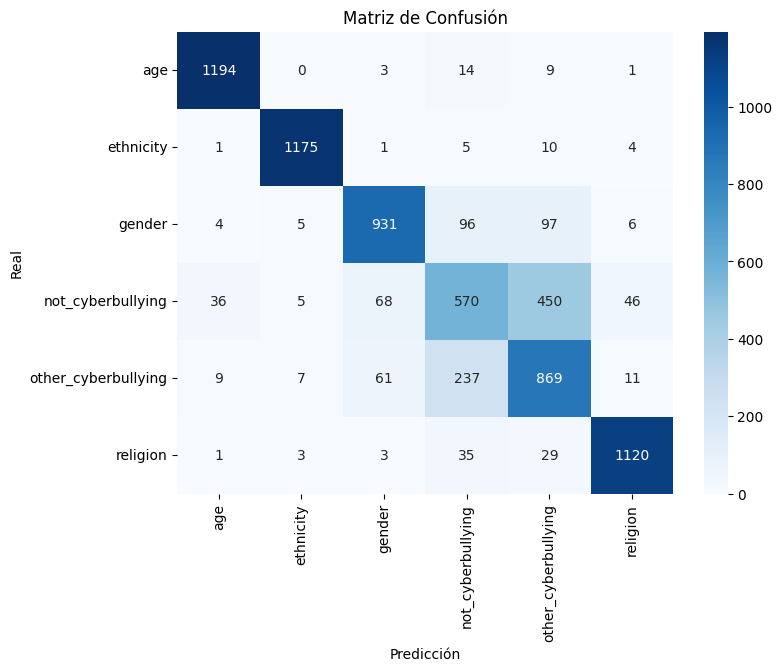

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Generar la matriz de confusión
confusion = confusion_matrix(true_labels, predicted_labels)

#  matriz de confusión
class_names = label_encoder.classes_
confusion_df = pd.DataFrame(confusion, index=class_names, columns=class_names)

# Visualizar la matriz de confusión como un mapa de calor
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_df, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión')
plt.show()


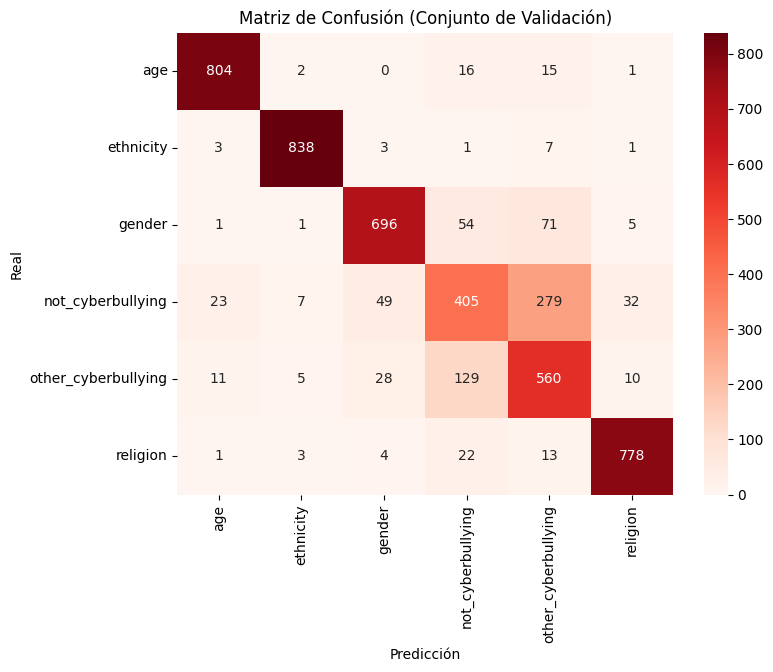

In [ ]:
# Generar la matriz de confusión para el conjunto de validación
confusion_val = confusion_matrix(true_labels_val, predicted_labels_val)

# Crear un DataFrame para la matriz de confusión
confusion_df_val = pd.DataFrame(confusion_val, index=class_names, columns=class_names)
# Visualizar la matriz de confusión del conjunto de validación como un mapa de calor
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_df_val, annot=True, fmt='d', cmap='Reds')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión (Conjunto de Validación)')
plt.show()
